# Exercise 5 Python tips

Below are a few tips that will be helpful in working in Exercise 5.

## Determining whether a number is odd or even in Python

In order to handle some plotting issues related to the glacier flow velocities we need to be able to determine whether a number is odd or even using Python. This turns out to be pretty easy, but is perhaps not clear right away.

In essence, the approach is to use the Python modulo operator `%` to divide two integers. This operator basically does [long division](https://www.mathsisfun.com/long_division2.html) and will return the remainder from the division of integer. If we decide to divide by 2, we should have a remainder of 1 for any odd number and a remainder of 0 for any even number. We can take advantage of this.

In [1]:
# Define a number
number = 8

# Print the remainder when dividing by 2
print(number % 2)

0


In [2]:
# Define a list of numbers
numbers = [2, 4, 5, 7, 13, 6]

# Loop over the numbers and print which are even or odd
for number in numbers:
    if number % 2 == 0:
        print(f"{number} is even!")
    else:
        print(f"{number} is odd!")

2 is even!
4 is even!
5 is odd!
7 is odd!
13 is odd!
6 is even!


## A plotting trick for functions with odd exponents

One thing that may cause issues in this week's exercise is the fact that the equation for calculating the velocity does not work properly in some cases for negative values and certain exponents. Some examples of how to deal with this are below.

In [3]:
# Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define a range of x values from 0 to 1
x = np.linspace(0.0, 1.0, 51)
print(x)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


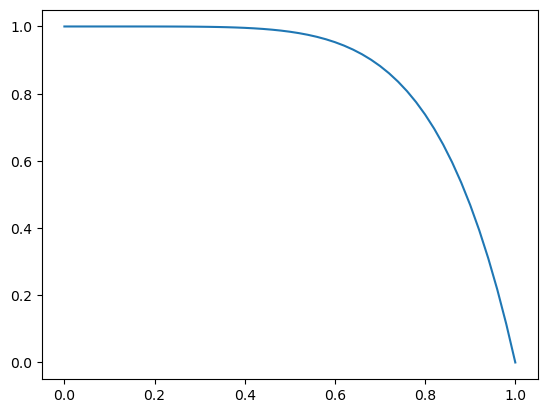

In [5]:
# Dummy velocity equation
n = 5
y = 1 - x**(n + 1)

# Plot results
plt.plot(x, y)

In [6]:
# Redefine x to range from -1 to 1
x = np.linspace(-1.0, 1.0, 51)
print(x)

[-1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56
 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08
 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4
  0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88
  0.92  0.96  1.  ]


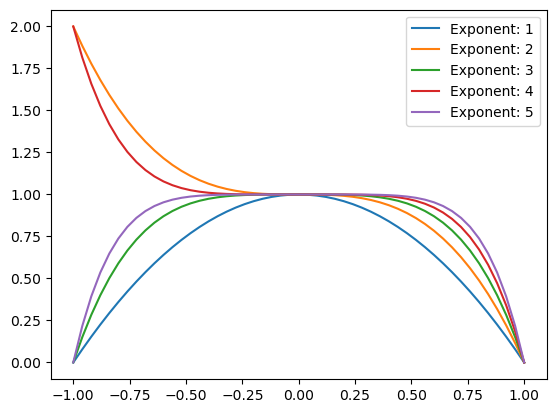

In [7]:
# Loop over different exponents, calculate dummy velocity and plot
for n in range(1, 6):
    # Dummy velocity equation
    y = 1 - x**(n+1)
    
    plt.plot(x, y, label = f"Exponent: {n}")

plt.legend()

We have some flyaway hairs it seems...

In [8]:
# Evaluate whether x is negative (False if not)
x < 0.0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [9]:
# Extract negative values of x
x[x < 0.0]

array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
       -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
       -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04])

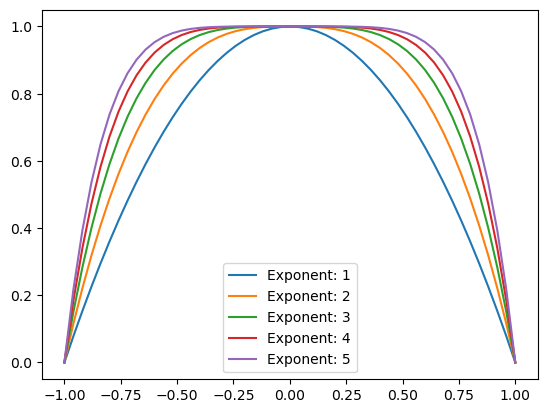

In [10]:
# Loop over different exponents, calculate dummy velocity and plot
for n in range(1, 6):
    # Dummy velocity equation
    y = 1 - x**(n+1)
    # Find whether we have an even number
    if n % 2 == 0:
        # Use a different equation when the values of x are negative
        y[x < 0.0] = 1 + x[x < 0.0]**(n+1)
    
    plt.plot(x, y, label = f"Exponent: {n}")

plt.legend()

In [11]:
# Define a big array of exponent values (integers)
exponents = np.arange(1, 100, 1) 
print(exponents)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


In [12]:
# Evaluate whether the exponent is even
exponents % 2 == 0

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False])

In [13]:
# Show values of the exponent that are even
exponents[exponents % 2 == 0]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])